In [1]:
import kagglehub
camnugent_california_housing_prices_path = kagglehub.dataset_download('camnugent/california-housing-prices')

print('Data source import complete.')

Using Colab cache for faster access to the 'california-housing-prices' dataset.
Data source import complete.


Import Required Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Load the California Housing Dataset

In [12]:
# Load dataset
housing = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add target column (House Price)
df['MedHouseValue'] = housing.target

# Display first 5 rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Basic EDA

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [19]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseValue,0


Visualization: Distribution of House Prices

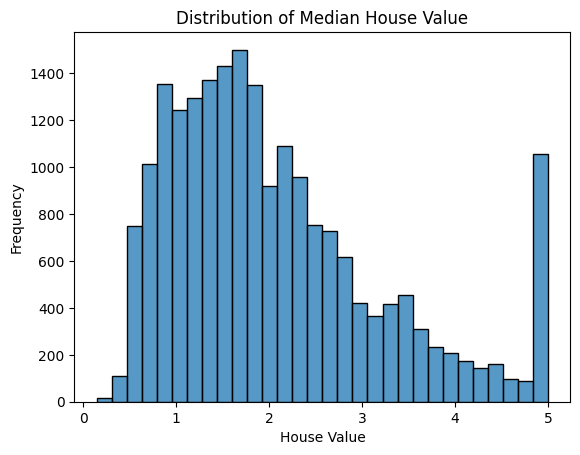

In [20]:
plt.figure()
sns.histplot(df['MedHouseValue'], bins=30)
plt.title("Distribution of Median House Value")
plt.xlabel("House Value")
plt.ylabel("Frequency")
plt.show()

Correlation Heatmap

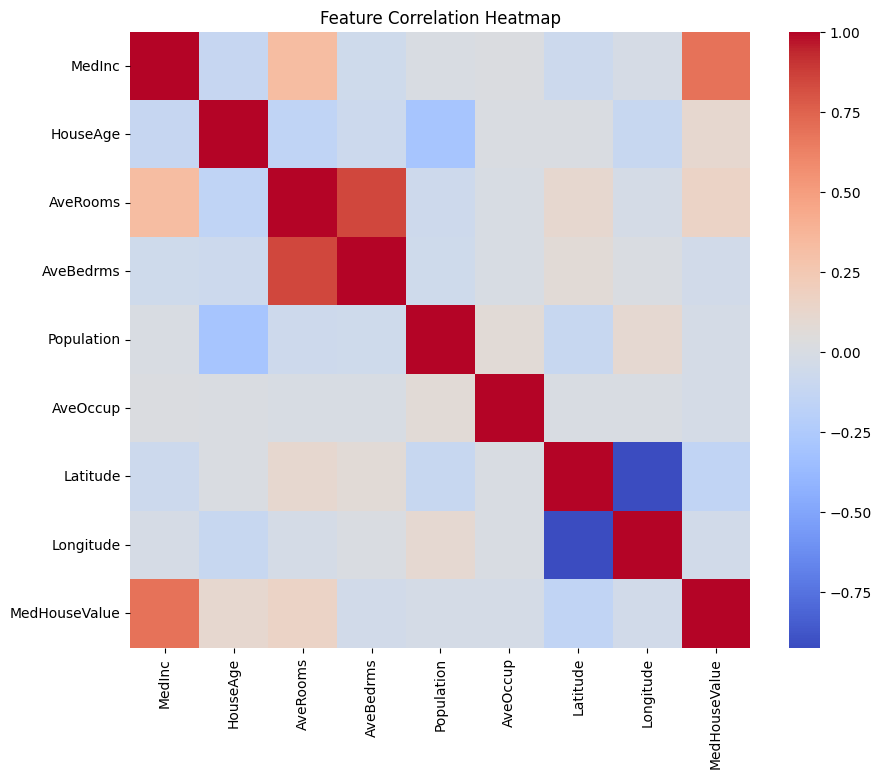

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

Prepare Data for Training

In [22]:
# Features (X) and Target (y)
X = df.drop('MedHouseValue', axis=1)
y = df['MedHouseValue']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (16512, 8)
Testing data size: (4128, 8)


Train Linear Regression Model

In [23]:
# Create model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

print("Model training completed!")

Model training completed!


Make Predictions

In [24]:
# Predict on test data
y_pred = model.predict(X_test)

# Compare actual vs predicted
comparison = pd.DataFrame({
    "Actual Price": y_test,
    "Predicted Price": y_pred
})

comparison.head()

,Actual Price,Predicted Price
20046,0.47700,0.719123
3024,0.45800,1.764017
15663,5.00001,2.709659
20484,2.18600,2.838926
9814,2.78000,2.604657


Evaluate the Model

In [25]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.5332001304956553
Root Mean Squared Error (RMSE): 0.7455813830127764
R² Score: 0.5757877060324508


Actual vs Predicted Plot

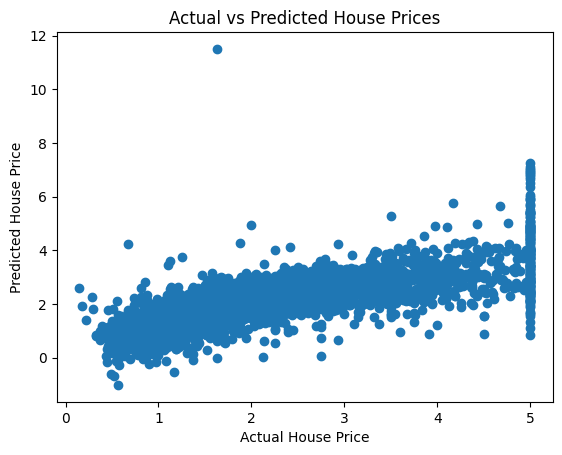

In [26]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

Save the Model

In [27]:
import pickle

with open("linear_regression_house_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!
